In [47]:
import os
import cv2
import numpy as np

IMG_WIDTH = 256
IMG_HEIGHT = 256

def load_images(image_folder, mask_folder):
    images = []
    masks = []

    # List of image and mask files
    image_files = sorted(os.listdir(image_folder))
    mask_files = sorted(os.listdir(mask_folder))

    print(f"Image Files: {image_files}")
    print(f"Mask Files: {mask_files}")

    # Iterate through image and mask files
    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)

        # Read and resize the image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Use IMREAD_COLOR for 3-channel images
        if img is None:
            print(f"Failed to read image {img_file}.")
            continue
        
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize image
        img = img / 255.0  # Normalize the image to [0, 1]

        # Read and resize the mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Mask should be grayscale
        if mask is None:
            print(f"Failed to read mask {mask_file}.")
            continue
        
        mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))  # Resize mask
        mask = np.expand_dims(mask, axis=-1)  # Add a channel dimension to mask
        mask = mask / 255.0  # Normalize the mask to [0, 1]

        # Append image and mask to their respective lists
        images.append(img)
        masks.append(mask)

    print(f"Successfully loaded {len(images)} images and {len(masks)} masks.")
    return np.array(images), np.array(masks)

# Provide correct paths to your image and mask folders
image_folder = 'train/original_image'
mask_folder = 'train/binary_mask'

# Load images and masks
images, masks = load_images(image_folder, mask_folder)

if images is not None and masks is not None:
    print(f"Loaded {len(images)} images and {len(masks)} masks.")
else:
    print("Error loading images and masks.")

masks.shape


Image Files: ['.ipynb_checkpoints', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '008

(750, 256, 256, 1)

In [49]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [51]:
X_train, X_val, y_train, y_val = train_test_split(images , masks, test_size=0.2, random_state=42)


In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_segnet(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Decoder
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)
    
    model = models.Model(inputs, outputs)
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model
input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)  # 3 if RGB images, 1 if grayscale
segnet = build_segnet(input_shape=input_shape)

segnet.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 256, 256, 1)    │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,089 (1.13 MB)

 Trainable params: 297,089 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Train the model
history = segnet.fit(X_train, y_train, 
                     batch_size=8, 
                     epochs=10, 
                     validation_data=(X_val, y_val))

# Save the model after training
segnet.save('segnet_model.h5')


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9218 - loss: 0.2307 - val_accuracy: 0.9830 - val_loss: 0.0828
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9839 - loss: 0.0759 - val_accuracy: 0.9830 - val_loss: 0.0718
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9840 - loss: 0.0665 - val_accuracy: 0.9830 - val_loss: 0.0646
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9831 - loss: 0.0663 - val_accuracy: 0.9830 - val_loss: 0.0606
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9838 - loss: 0.0612 - val_accuracy: 0.9830 - val_loss: 0.0624
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9827 - loss: 0.0666 - val_accuracy: 0.9830 - val_loss: 0.0604
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9836 - loss: 0.0597 - val_accuracy: 0.9830 - val_loss: 0.0574
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9823 - loss: 0.0617 - val_accuracy: 0.9830 - v

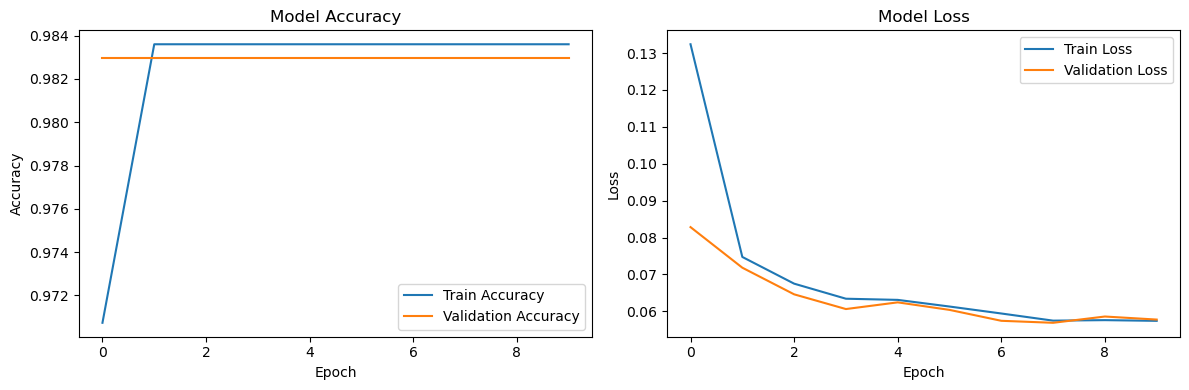

In [61]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


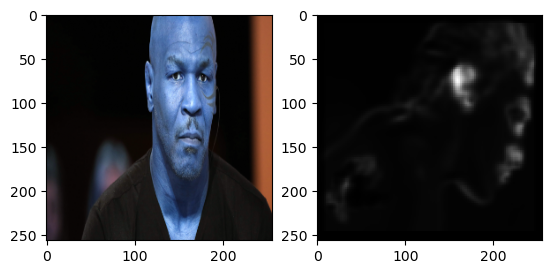

In [65]:
# Make predictions on validation set
predictions = segnet.predict(X_val)

# Display the first prediction and corresponding ground truth mask
plt.subplot(1, 2, 1)
plt.imshow(X_val[0].reshape(IMG_HEIGHT, IMG_WIDTH, 3))  # Display original image

plt.subplot(1, 2, 2)
plt.imshow(predictions[1].reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')  # Display predicted mask

plt.show()
